# Problem Statement
### AtliQ Mart is a growing FMCG manufacturer headquartered in Gujarat, India. It is currently operational in three cities Surat, Ahmedabad and Vadodara. They want to expand to other metros/Tier 1 cities in the next 2 years.

### AtliQ Mart is currently facing a problem where a few key customers did not extend their annual contracts due to service issues. It is speculated that some of the essential products were either not delivered on time or not delivered in full over a continued period, which could have resulted in bad customer service. Management wants to fix this issue before expanding to other cities and requested their supply chain analytics team to track the ’On time’ and ‘In Full’ delivery service level for all the customers daily basis so that they can respond swiftly to these issues.

### The Supply Chain team decided to use a standard approach to measure the service level in which they will measure ‘On-time delivery (OT) %’, ‘In-full delivery (IF) %’, and OnTime in full (OTIF) %’ of the customer orders daily basis against the target service level set for each customer.

---
---
---

# Importing Libraries & Uploading Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf as run

In [2]:
files = [r"C:\Users\m\Taha\Codebasics Challenges\Supply Chain\C2 Input for participants\dim_customers.csv",
r"C:\Users\m\Taha\Codebasics Challenges\Supply Chain\C2 Input for participants\dim_date.csv",
r"C:\Users\m\Taha\Codebasics Challenges\Supply Chain\C2 Input for participants\dim_products.csv",
r"C:\Users\m\Taha\Codebasics Challenges\Supply Chain\C2 Input for participants\dim_targets_orders.csv",
r"C:\Users\m\Taha\Codebasics Challenges\Supply Chain\C2 Input for participants\fact_order_lines.csv",
r"C:\Users\m\Taha\Codebasics Challenges\Supply Chain\C2 Input for participants\fact_orders_aggregate.csv"]

tables = []

for file in files:
    file_name = file.split('\\')[-1].split('.')[0]
    dataframe = pd.read_csv(file)
    globals()[file_name] = dataframe
    tables.append(dataframe)

# EDA

In [3]:
dim_customers.head()

,customer_id,customer_name,city
0,789201,Rel Fresh,Surat
1,789202,Rel Fresh,Ahmedabad
2,789203,Rel Fresh,Vadodara
3,789301,Expression Stores,Surat
4,789303,Expression Stores,Vadodara


In [4]:
dim_date.head()

,date,mmm_yy,week_no
0,01-Apr-22,01-Apr-22,W 14
1,03-Apr-22,01-Apr-22,W 15
2,04-Apr-22,01-Apr-22,W 15
3,05-Apr-22,01-Apr-22,W 15
4,06-Apr-22,01-Apr-22,W 15


In [5]:
dim_products.head()

,product_name,product_id,category
0,AM Milk 500,25891101,Dairy
1,AM Milk 250,25891102,Dairy
2,AM Milk 100,25891103,Dairy
3,AM Butter 100,25891201,Dairy
4,AM Butter 250,25891202,Dairy


In [6]:
dim_targets_orders.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [7]:
fact_order_lines.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,"Tuesday, March 1, 2022",789203,25891601,110,"Friday, March 4, 2022","Friday, March 4, 2022",110,1,1,1
1,FMR32320302,"Tuesday, March 1, 2022",789320,25891203,347,"Wednesday, March 2, 2022","Wednesday, March 2, 2022",347,1,1,1
2,FMR33320501,"Tuesday, March 1, 2022",789320,25891203,187,"Thursday, March 3, 2022","Thursday, March 3, 2022",150,0,1,0
3,FMR34220601,"Tuesday, March 1, 2022",789220,25891203,235,"Friday, March 4, 2022","Friday, March 4, 2022",235,1,1,1
4,FMR33703603,"Tuesday, March 1, 2022",789703,25891203,176,"Thursday, March 3, 2022","Thursday, March 3, 2022",176,1,1,1


In [8]:
fact_orders_aggregate.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,01-Mar-22,1,0,0
1,FMR34103403,789103,01-Mar-22,1,0,0
2,FMR32103602,789103,01-Mar-22,1,0,0
3,FMR33103602,789103,01-Mar-22,1,0,0
4,FMR33103401,789103,01-Mar-22,1,0,0


# Missing Values

In [9]:
for t in tables:
    print(t.isnull().sum(), '\n')

customer_id      0
customer_name    0
city             0
dtype: int64 

date       0
mmm_yy     0
week_no    0
dtype: int64 

product_name    0
product_id      0
category        0
dtype: int64 

customer_id       0
ontime_target%    0
infull_target%    0
otif_target%      0
dtype: int64 

order_id                0
order_placement_date    0
customer_id             0
product_id              0
order_qty               0
agreed_delivery_date    0
actual_delivery_date    0
delivery_qty            0
In Full                 0
On Time                 0
On Time In Full         0
dtype: int64 

order_id                0
customer_id             0
order_placement_date    0
on_time                 0
in_full                 0
otif                    0
dtype: int64 



# Duplicates

In [10]:
for t in tables:
    print(t[t.duplicated() == True], '\n')

Empty DataFrame
Columns: [customer_id, customer_name, city]
Index: [] 

Empty DataFrame
Columns: [date, mmm_yy, week_no]
Index: [] 

Empty DataFrame
Columns: [product_name, product_id, category]
Index: [] 

Empty DataFrame
Columns: [customer_id, ontime_target%, infull_target%, otif_target%]
Index: [] 

Empty DataFrame
Columns: [order_id, order_placement_date, customer_id, product_id, order_qty, agreed_delivery_date, actual_delivery_date, delivery_qty, In Full, On Time, On Time In Full]
Index: [] 

Empty DataFrame
Columns: [order_id, customer_id, order_placement_date, on_time, in_full, otif]
Index: [] 



# Data Types & Shapes

In [11]:
for t in tables:
    print(t.dtypes)
    print(f'shape : {t.shape}', '\n')

customer_id       int64
customer_name    object
city             object
dtype: object
shape : (35, 3) 

date       object
mmm_yy     object
week_no    object
dtype: object
shape : (183, 3) 

product_name    object
product_id       int64
category        object
dtype: object
shape : (18, 3) 

customer_id       int64
ontime_target%    int64
infull_target%    int64
otif_target%      int64
dtype: object
shape : (35, 4) 

order_id                object
order_placement_date    object
customer_id              int64
product_id               int64
order_qty                int64
agreed_delivery_date    object
actual_delivery_date    object
delivery_qty             int64
In Full                  int64
On Time                  int64
On Time In Full          int64
dtype: object
shape : (57096, 11) 

order_id                object
customer_id              int64
order_placement_date    object
on_time                  int64
in_full                  int64
otif                     int64
dtype: object
sha

# Unique Values

In [12]:
for t in tables:
    print(t.nunique(), '\n')

customer_id      35
customer_name    15
city              3
dtype: int64 

date       183
mmm_yy       6
week_no     27
dtype: int64 

product_name    18
product_id      18
category         3
dtype: int64 

customer_id       35
ontime_target%    12
infull_target%    12
otif_target%      15
dtype: int64 

order_id                31729
order_placement_date      183
customer_id                35
product_id                 18
order_qty                 481
agreed_delivery_date      183
actual_delivery_date      187
delivery_qty              485
In Full                     2
On Time                     2
On Time In Full             2
dtype: int64 

order_id                31729
customer_id                35
order_placement_date      183
on_time                     2
in_full                     2
otif                        2
dtype: int64 



# Fixing Date Columns

In [13]:
fact_orders_aggregate['order_placement_date'] = pd.to_datetime(fact_orders_aggregate['order_placement_date'], 
                                                               dayfirst = True, format = 'mixed')

In [14]:
fact_order_lines['agreed_delivery_date'] = pd.to_datetime(fact_order_lines['agreed_delivery_date'])
fact_order_lines['actual_delivery_date'] = pd.to_datetime(fact_order_lines['actual_delivery_date'])
fact_order_lines['order_placement_date'] = pd.to_datetime(fact_order_lines['order_placement_date'])

In [15]:
fact_order_lines.dtypes

order_id                        object
order_placement_date    datetime64[ns]
customer_id                      int64
product_id                       int64
order_qty                        int64
agreed_delivery_date    datetime64[ns]
actual_delivery_date    datetime64[ns]
delivery_qty                     int64
In Full                          int64
On Time                          int64
On Time In Full                  int64
dtype: object

In [16]:
fact_orders_aggregate.dtypes

order_id                        object
customer_id                      int64
order_placement_date    datetime64[ns]
on_time                          int64
in_full                          int64
otif                             int64
dtype: object

# Fixing Customer ID

In [17]:
fact_orders_aggregate['customer_id'] = fact_orders_aggregate['customer_id'].astype(str)
fact_order_lines['customer_id'] = fact_order_lines['customer_id'].astype(str)
dim_customers['customer_id'] = dim_customers['customer_id'].astype(str)
dim_targets_orders['customer_id'] = dim_targets_orders['customer_id'].astype(str)

# Renaming DataFrames

In [18]:
lines = fact_order_lines.copy()
orders = fact_orders_aggregate.copy()
targets = dim_targets_orders.copy()

---
---
---

# 1. Actual Vs Target

In [19]:
orders.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,2022-03-01,1,0,0
1,FMR34103403,789103,2022-03-01,1,0,0
2,FMR32103602,789103,2022-03-01,1,0,0
3,FMR33103602,789103,2022-03-01,1,0,0
4,FMR33103401,789103,2022-03-01,1,0,0


In [20]:
targets.head()

,customer_id,ontime_target%,infull_target%,otif_target%
0,789201,87,81,70
1,789202,85,81,69
2,789203,92,76,70
3,789301,89,78,69
4,789303,88,78,69


In [21]:
targets.describe()

,ontime_target%,infull_target%,otif_target%
count,35.000000,35.000000,35.000000
mean,86.085714,76.514286,65.914286
std,5.632737,5.500649,6.621584
min,75.000000,65.000000,49.000000
25%,85.000000,75.500000,62.000000
50%,87.000000,79.000000,68.000000
75%,90.500000,80.500000,70.000000
max,92.000000,82.000000,75.000000


---
- ### For Customers
---

In [22]:
query = """
with actual as 
    (select
        customer_id,
        count(*) as tot_orders,
        round((cast(sum(on_time) as real)/ count(*)) * 100) as act_ontime,
        round((cast(sum(in_full) as real)/ count(*)) * 100) as act_infull,
        round((cast(sum(otif) as real)/ count(*)) * 100) as act_otif
    from
        orders
    group by
        customer_id)
select
    a.*,
    t.`ontime_target%` as trg_ontime,
    t.`infull_target%` as trg_infull,
    t.`otif_target%` as trg_otif
from
    targets as t
join
    actual as a
on
    t.customer_id = a.customer_id
order by
    a.act_infull
"""
res1 = run(query)
res1

,customer_id,tot_orders,act_ontime,act_infull,act_otif,trg_ontime,trg_infull,trg_otif
0,789903,813,72.0,17.0,10.0,92,65,60
1,789103,815,75.0,18.0,11.0,92,67,62
2,789702,832,72.0,18.0,11.0,89,66,59
3,789601,827,71.0,19.0,9.0,92,67,62
4,789122,1218,29.0,22.0,7.0,76,65,49
5,789520,1126,30.0,22.0,7.0,75,68,51
6,789421,1179,28.0,24.0,8.0,78,66,51
7,789201,784,73.0,57.0,37.0,87,81,70
8,789203,830,71.0,58.0,37.0,92,76,70
9,789301,842,69.0,58.0,35.0,89,78,69


In [25]:
res1['ontime_diff'] = res1['act_ontime'] - res1['trg_ontime']
res1['infull_diff'] = res1['act_infull'] - res1['trg_infull']
res1['otif_diff'] = res1['act_otif'] - res1['trg_otif']

In [26]:
res1.describe()

,tot_orders,act_ontime,act_infull,act_otif,trg_ontime,trg_infull,trg_otif,ontime_diff,infull_diff,otif_diff
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,906.542857,62.057143,52.914286,30.400000,86.085714,76.514286,65.914286,-24.028571,-23.600000,-35.514286
std,156.169279,18.376684,16.983333,12.843401,5.632737,5.500649,6.621584,13.559207,12.127266,7.751172
min,784.000000,28.000000,17.000000,7.000000,75.000000,65.000000,49.000000,-51.000000,-49.000000,-53.000000
25%,819.500000,69.500000,58.000000,20.000000,85.000000,75.500000,62.000000,-21.000000,-22.500000,-41.000000
50%,830.000000,71.000000,60.000000,38.000000,87.000000,79.000000,68.000000,-19.000000,-20.000000,-34.000000
75%,845.000000,73.000000,61.000000,40.000000,90.500000,80.500000,70.000000,-15.500000,-16.500000,-29.000000
max,1219.000000,75.000000,69.000000,42.000000,92.000000,82.000000,75.000000,-11.000000,-10.000000,-25.000000


In [31]:
res1[res1['act_infull'] >= res1['trg_infull']]

,customer_id,tot_orders,act_ontime,act_infull,act_otif,trg_ontime,trg_infull,trg_otif


In [32]:
res1[res1['act_ontime'] >= res1['trg_ontime']]

,customer_id,tot_orders,act_ontime,act_infull,act_otif,trg_ontime,trg_infull,trg_otif


- didn't reach our target even once

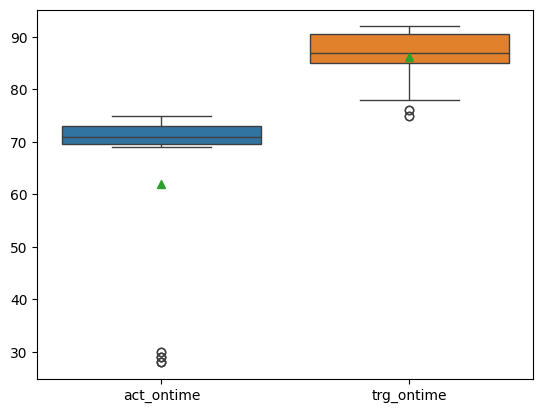

In [74]:
sns.boxplot(res1[['act_ontime', 'trg_ontime']], showmeans = True)
plt.show()

In [32]:
pd.merge(dim_customers, res1[res1['act_ontime'] <= 35], on = 'customer_id')

,customer_id,customer_name,city,tot_orders,act_ontime,act_infull,act_otif,trg_ontime,trg_infull,trg_otif,ontime_diff,infull_diff,otif_diff
0,789121,Coolblue,Ahmedabad,1219,30.0,67.0,20.0,78,77,60,-48.0,-10.0,-40.0
1,789122,Coolblue,Vadodara,1218,29.0,22.0,7.0,76,65,49,-47.0,-43.0,-42.0
2,789420,Lotus Mart,Surat,1203,28.0,69.0,21.0,75,79,59,-47.0,-10.0,-38.0
3,789421,Lotus Mart,Ahmedabad,1179,28.0,24.0,8.0,78,66,51,-50.0,-42.0,-43.0
4,789422,Lotus Mart,Vadodara,1168,28.0,67.0,20.0,79,81,64,-51.0,-14.0,-44.0
5,789520,Acclaimed Stores,Surat,1126,30.0,22.0,7.0,75,68,51,-45.0,-46.0,-44.0
6,789521,Acclaimed Stores,Ahmedabad,1194,29.0,66.0,19.0,78,79,62,-49.0,-13.0,-43.0
7,789522,Acclaimed Stores,Vadodara,1190,29.0,67.0,20.0,76,79,60,-47.0,-12.0,-40.0


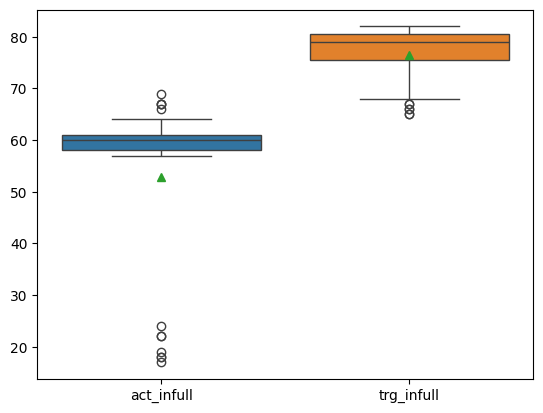

In [75]:
sns.boxplot(res1[['act_infull', 'trg_infull']], showmeans = True)
plt.show()

In [30]:
pd.merge(dim_customers, res1[res1['act_infull'] <= 30], on = 'customer_id')

,customer_id,customer_name,city,tot_orders,act_ontime,act_infull,act_otif,trg_ontime,trg_infull,trg_otif,ontime_diff,infull_diff,otif_diff
0,789103,Vijay Stores,Vadodara,815,75.0,18.0,11.0,92,67,62,-17.0,-49.0,-51.0
1,789122,Coolblue,Vadodara,1218,29.0,22.0,7.0,76,65,49,-47.0,-43.0,-42.0
2,789421,Lotus Mart,Ahmedabad,1179,28.0,24.0,8.0,78,66,51,-50.0,-42.0,-43.0
3,789520,Acclaimed Stores,Surat,1126,30.0,22.0,7.0,75,68,51,-45.0,-46.0,-44.0
4,789601,Info Stores,Surat,827,71.0,19.0,9.0,92,67,62,-21.0,-48.0,-53.0
5,789702,Sorefoz Mart,Ahmedabad,832,72.0,18.0,11.0,89,66,59,-17.0,-48.0,-48.0
6,789903,Elite Mart,Vadodara,813,72.0,17.0,10.0,92,65,60,-20.0,-48.0,-50.0


<Figure size 1000x500 with 0 Axes>

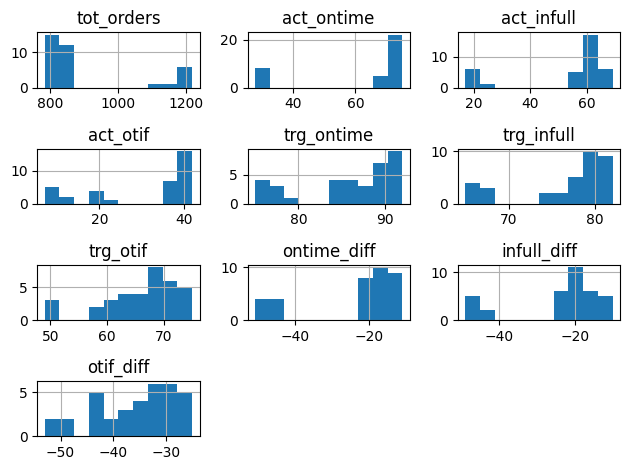

In [31]:
res1.hist()
plt.tight_layout()
plt.show()

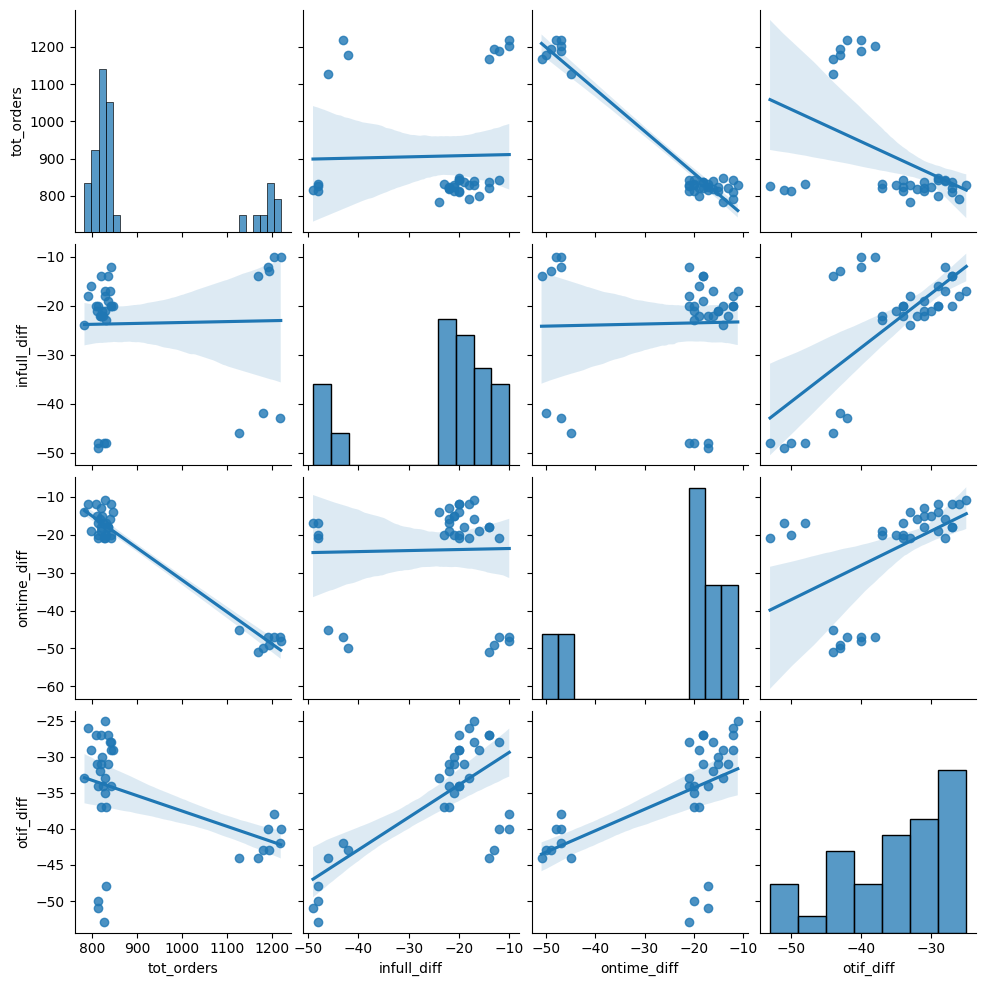

In [35]:
sns.pairplot(res1[['tot_orders', 'infull_diff', 'ontime_diff', 'otif_diff']], kind = 'reg')
plt.show()
# customers with higher orders which are more important than others, their shipments are being delayed on a higher rate

---
- Orders VS Lines
---

In [40]:
query = """
select
    order_id,
    count(*) as lines
from
    lines
group by
    order_id
"""
tot_lines = run(query)

In [41]:
pd.merge(orders, tot_lines).sort_values(by = 'lines', ascending = False)

,order_id,customer_id,order_placement_date,on_time,in_full,otif,lines
28072,FAUG812220603,789220,2022-08-09,1,0,0,9
3708,FMR323221602,789221,2022-03-22,1,0,0,9
11240,FMY56503503,789503,2022-05-04,1,0,0,8
8568,FAP422702602,789702,2022-04-19,1,0,0,8
31550,FAUG830903603,789903,2022-08-29,1,0,0,8
...,...,...,...,...,...,...,...
18638,FJUN616420201,789420,2022-06-15,0,1,0,1
7362,FAP415122601,789122,2022-04-12,1,0,0,1
7364,FAP415520103,789520,2022-04-12,1,0,0,1
18635,FJUN616121601,789121,2022-06-15,0,1,0,1


In [42]:
orders.head()

,order_id,customer_id,order_placement_date,on_time,in_full,otif
0,FMR32103503,789103,2022-03-01,1,0,0
1,FMR34103403,789103,2022-03-01,1,0,0
2,FMR32103602,789103,2022-03-01,1,0,0
3,FMR33103602,789103,2022-03-01,1,0,0
4,FMR33103401,789103,2022-03-01,1,0,0


---
# 2. Line Fill Rate (LIFR%)
---

In [43]:
lines.head()

,order_id,order_placement_date,customer_id,product_id,order_qty,agreed_delivery_date,actual_delivery_date,delivery_qty,In Full,On Time,On Time In Full
0,FMR34203601,2022-03-01,789203,25891601,110,2022-03-04,2022-03-04,110,1,1,1
1,FMR32320302,2022-03-01,789320,25891203,347,2022-03-02,2022-03-02,347,1,1,1
2,FMR33320501,2022-03-01,789320,25891203,187,2022-03-03,2022-03-03,150,0,1,0
3,FMR34220601,2022-03-01,789220,25891203,235,2022-03-04,2022-03-04,235,1,1,1
4,FMR33703603,2022-03-01,789703,25891203,176,2022-03-03,2022-03-03,176,1,1,1


- By Product

In [44]:
query = """
select
    product_id,
    count(*) as tot_lines,
    round((cast(sum(`In Full`) as real)/ count(*)) * 100) as LIFR
from
    lines
group by
    product_id
order by
    LIFR desc
"""
run(query)
# All products have almost the same LIFR, on avgerage 66%

,product_id,tot_lines,LIFR
0,25891501,3158,68.0
1,25891101,3139,68.0
2,25891402,3177,67.0
3,25891401,3138,67.0
4,25891302,3209,67.0
5,25891201,3170,67.0
6,25891601,3184,66.0
7,25891502,3195,66.0
8,25891403,3187,66.0
9,25891303,3098,66.0


---
- By Month
---

In [45]:
query = """
select
    strftime('%m', order_placement_date) as month,
    count(*) as tot_lines,
    round((cast(sum(`In Full`) as real)/ count(*)) * 100) as LIFR
from
    lines
group by
    strftime('%m', order_placement_date)
order by
    LIFR desc, tot_lines desc
"""
run(query)
# same case as product

,month,tot_lines,LIFR
0,05,9756,66.0
1,03,9755,66.0
2,07,9685,66.0
3,04,9402,66.0
4,06,9389,66.0
5,08,9109,66.0


---
- By Customer
---

In [37]:
query = """
select
    customer_id,
    count(*) as tot_lines,
    round((cast(sum(`In Full`) as real)/ count(*)) * 100) as LIFR
from
    lines
group by
    customer_id
order by
    LIFR desc
"""
res2 = run(query)
res2
# very low LIFR for some customers, only around 30% of their lines where shipped in full 

,customer_id,tot_lines,LIFR
0,789303,1621,77.0
1,789902,1643,76.0
2,789703,1642,76.0
3,789621,1642,76.0
4,789603,1607,76.0
5,789403,1585,76.0
6,789402,1657,76.0
7,789321,1593,76.0
8,789320,1634,76.0
9,789220,1621,76.0


In [38]:
pd.merge(dim_customers, res2[res2['LIFR'] <= 32], on = 'customer_id')

,customer_id,customer_name,city,tot_lines,LIFR
0,789103,Vijay Stores,Vadodara,1666,30.0
1,789122,Coolblue,Vadodara,1675,29.0
2,789421,Lotus Mart,Ahmedabad,1602,31.0
3,789520,Acclaimed Stores,Surat,1566,29.0
4,789601,Info Stores,Surat,1620,30.0
5,789702,Sorefoz Mart,Ahmedabad,1639,31.0
6,789903,Elite Mart,Vadodara,1641,30.0


---
- By Customer & Product
---

In [39]:
query = """
select
    customer_id,
    product_id,
    count(*) as tot_lines,
    round((cast(sum(`In Full`) as real)/ count(*)) * 100) as LIFR
from
    lines
group by
    customer_id, product_id
order by
    customer_id, LIFR 
"""
cus_prod = run(query)
cus_prod

,customer_id,product_id,tot_lines,LIFR
0,789101,25891502,89,67.0
1,789101,25891201,82,68.0
2,789101,25891503,87,68.0
3,789101,25891602,85,68.0
4,789101,25891601,90,69.0
...,...,...,...,...
625,789903,25891101,89,34.0
626,789903,25891201,86,34.0
627,789903,25891202,96,34.0
628,789903,25891402,92,36.0


In [40]:
cus_prod['LIFR'].describe()

count    630.000000
mean      65.950794
std       18.615321
min       16.000000
25%       68.000000
50%       74.000000
75%       77.000000
max       89.000000
Name: LIFR, dtype: float64

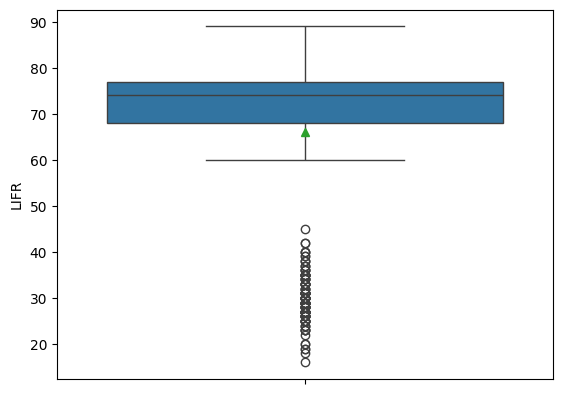

In [41]:
sns.boxplot(cus_prod['LIFR'], showmeans = 'True')
plt.show()

In [42]:
low_LIFR = cus_prod[cus_prod['LIFR'] <= 50]

In [46]:
query = """
select
    c.customer_name, c.city,
    p.product_name, p.category,
    l.tot_lines ,l.LIFR
from
    cus_prod as l
join
    dim_customers as c
on
    l.customer_id = c.customer_id
join
    dim_products as p
on
    p.product_id = l.product_id
"""
res3 = run(query)
res3

,customer_name,city,product_name,category,tot_lines,LIFR
0,Vijay Stores,Surat,AM Biscuits 500,Food,89,67.0
1,Vijay Stores,Surat,AM Butter 100,Dairy,82,68.0
2,Vijay Stores,Surat,AM Biscuits 250,Food,87,68.0
3,Vijay Stores,Surat,AM Tea 250,beverages,85,68.0
4,Vijay Stores,Surat,AM Tea 500,beverages,90,69.0
...,...,...,...,...,...,...
625,Elite Mart,Vadodara,AM Milk 500,Dairy,89,34.0
626,Elite Mart,Vadodara,AM Butter 100,Dairy,86,34.0
627,Elite Mart,Vadodara,AM Butter 250,Dairy,96,34.0
628,Elite Mart,Vadodara,AM Curd 100,Dairy,92,36.0


In [47]:
res3.pivot_table(index = ['city'],
                columns = ['customer_name'],
                values = 'LIFR',
                aggfunc = 'mean')
# 7 customers with LIFR under 30%

customer_name,Acclaimed Stores,Atlas Stores,Chiptec Stores,Coolblue,Elite Mart,Expert Mart,Expression Stores,Info Stores,Logic Stores,Lotus Mart,Propel Mart,Rel Fresh,Sorefoz Mart,Vijay Stores,Viveks Stores
city,,,,,,,,,,,,,,,
Ahmedabad,72.833333,75.166667,75.722222,73.888889,75.666667,75.611111,NaN,NaN,74.722222,30.611111,75.833333,74.722222,30.666667,73.666667,NaN
Surat,29.388889,75.555556,75.555556,NaN,NaN,NaN,73.222222,30.000000,74.000000,74.888889,74.944444,74.833333,NaN,74.277778,74.944444
Vadodara,73.611111,NaN,NaN,29.222222,29.833333,75.555556,77.333333,76.388889,NaN,74.111111,76.000000,74.111111,75.777778,30.111111,75.500000


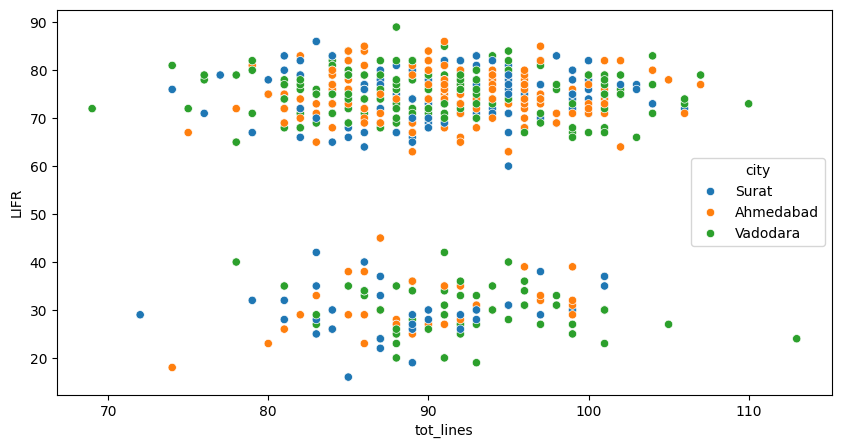

In [53]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = res3,
                x = 'tot_lines',
                y = 'LIFR',
                hue = 'city') # try other variables
plt.show()

------------
------------
------------

# 3. Volume Fill Rate (VOFR%)

- By Customers

In [56]:
query = """
select
    customer_id,
    sum(order_qty) ordered,
    sum(delivery_qty) delivered,
    round((cast(sum(delivery_qty) as real)/ sum(order_qty)) * 100) VOFR
from
    lines
group by
    customer_id
order by
    VOFR 
"""
run(query)
# between 93 and 98

,customer_id,ordered,delivered,VOFR
0,789103,397479,369866,93.0
1,789122,393462,365245,93.0
2,789421,376425,350900,93.0
3,789520,363197,336929,93.0
4,789601,380618,353368,93.0
5,789702,385023,358019,93.0
6,789903,383532,356364,93.0
7,789101,380409,370273,97.0
8,789102,398405,387604,97.0
9,789121,383162,373157,97.0


- By Month

In [57]:
query = """
select
    strftime('%m', order_placement_date) as month,
    sum(order_qty) as ordered,
    sum(delivery_qty) as delivered,
    round((cast(sum(delivery_qty) as real)/ sum(order_qty)) * 100, 2) as VOFR
from
    lines
group by
    strftime('%m', order_placement_date)
order by
    month 
"""
run(query)
# no signs here

,month,ordered,delivered,VOFR
0,03,2289498,2211756,96.60
1,04,2200996,2125780,96.58
2,05,2298831,2220444,96.59
3,06,2196371,2119661,96.51
4,07,2279870,2202316,96.60
5,08,2161370,2089200,96.66


- By Product

In [58]:
query = """
select
    product_id,
    sum(order_qty) ordered,
    sum(delivery_qty) delivered,
    round((cast(sum(delivery_qty) as real)/ sum(order_qty)) * 100) VOFR
from
    lines
group by
    product_id
order by
    VOFR desc
"""
run(query)

,product_id,ordered,delivered,VOFR
0,25891603,394712,381239,97.0
1,25891602,392461,378817,97.0
2,25891601,396571,382766,97.0
3,25891503,563366,544093,97.0
4,25891501,556996,539466,97.0
5,25891403,1119256,1081421,97.0
6,25891402,1105336,1067987,97.0
7,25891401,1099401,1063337,97.0
8,25891303,186186,179828,97.0
9,25891302,193524,187121,97.0


- By Customer & Product

In [59]:
query = """
select
    customer_id,
    product_id,
    sum(order_qty) ordered,
    sum(delivery_qty) delivered,
    round((cast(sum(delivery_qty) as real)/ sum(order_qty)) * 100) VOFR
from
    lines
group by
    customer_id, product_id
order by
    VOFR desc
"""
res = run(query)
res
# between 91 and 99

,customer_id,product_id,ordered,delivered,VOFR
0,789101,25891101,33339,32856,99.0
1,789102,25891303,5408,5331,99.0
2,789201,25891101,33306,32835,99.0
3,789201,25891602,10237,10091,99.0
4,789303,25891401,31199,30842,99.0
...,...,...,...,...,...
625,789903,25891302,5949,5489,92.0
626,789903,25891403,30887,28570,92.0
627,789903,25891601,10396,9566,92.0
628,789903,25891602,10679,9876,92.0


<Axes: ylabel='VOFR'>

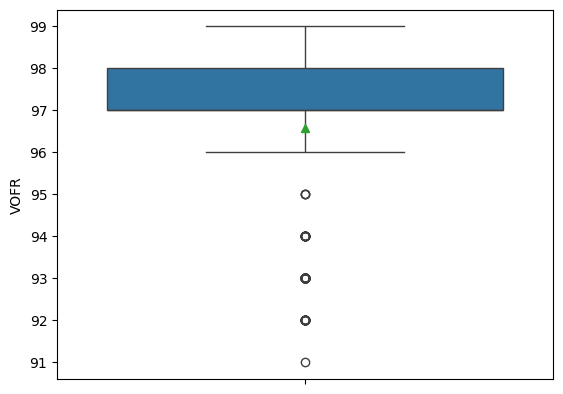

In [67]:
sns.boxplot(y = res['VOFR'], showmeans = True )